In [1]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

wcat = pd.read_csv("wc-at.csv")

In [2]:
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

wcat.info()
wcat.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [3]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes

{'whiskers': [<matplotlib.lines.Line2D at 0x7f61084e9790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f61084f2250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f61084e9250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f61084f2d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f610847a290>],
 'means': []}

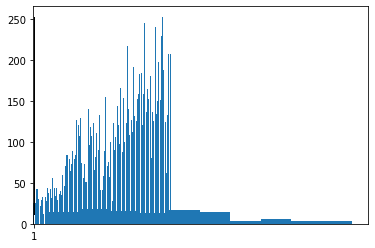

In [4]:
plt.bar(height = wcat.AT, x = np.arange(1, 110, 1))
plt.hist(wcat.AT) #histogram
plt.boxplot(wcat.AT) #boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6107e2fa50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6107e35510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6107e2f510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6107e35fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6107e3f550>],
 'means': []}

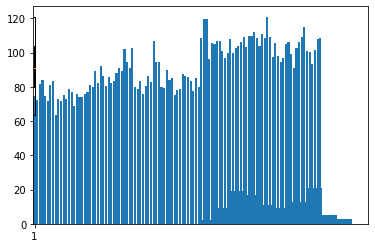

In [5]:
plt.bar(height = wcat.Waist, x = np.arange(1, 110, 1))
plt.hist(wcat.Waist) #histogram
plt.boxplot(wcat.Waist) #boxplot

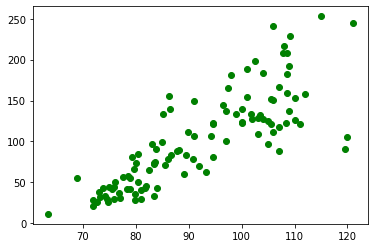

In [6]:
# Scatter plot
plt.scatter(x = wcat['Waist'], y = wcat['AT'], color = 'green')

In [7]:
# correlation
np.corrcoef(wcat.Waist, wcat.AT) 

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [8]:
# wcat.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('AT ~ Waist', data = wcat).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(wcat['Waist']))

In [9]:
pred1 # Y hat(y^)

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

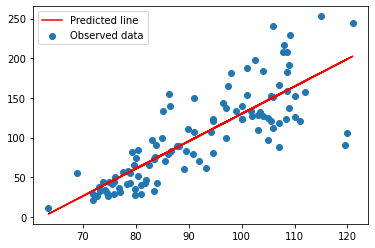

In [10]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [11]:
# Error calculation
res1 = wcat.AT - pred1
np.mean(res1)
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

32.760177495755144

In [12]:
res1 # standard deviation  = rms

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [13]:
res_sqr1

0       283.863582
1        85.409091
2       593.078852
3       997.912810
4       153.322979
          ...     
104      39.066715
105    1982.929211
106       9.799393
107    2577.649718
108    2371.226781
Length: 109, dtype: float64

In [14]:
mse1 #Mean squared erro

1073.2292295533816

In [15]:
np.mean(res1)

-6.779490322848662e-14

array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

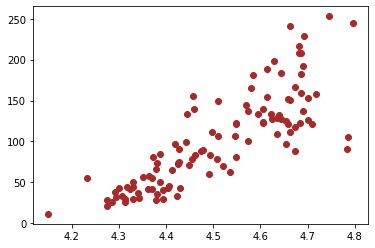

In [16]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(wcat['Waist']), y = wcat['AT'], color = 'brown')
np.corrcoef(np.log(wcat.Waist), wcat.AT) #correlation

In [17]:
model2 = smf.ols('AT ~ np.log(Waist)', data = wcat).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           6.80e-28
Time:                        04:05:23   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

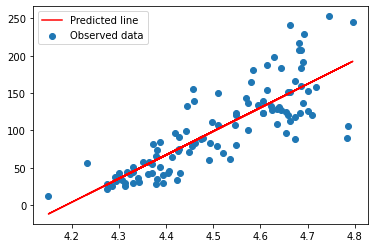

In [19]:
# Regression Line
plt.scatter(np.log(wcat.Waist), wcat.AT)
plt.plot(np.log(wcat.Waist), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [20]:
# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

32.49688490932126

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

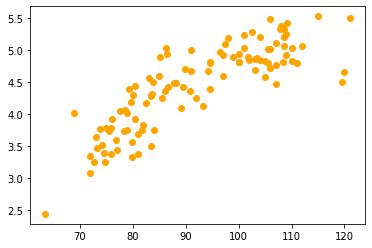

In [21]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['Waist'], y = np.log(wcat['AT']), color = 'orange')
np.corrcoef(wcat.Waist, np.log(wcat.AT)) #correlation

model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(wcat['Waist']))
pred3_at = np.exp(pred3)
pred3_at

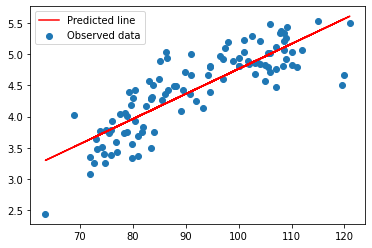

In [22]:
# Regression Line
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [23]:
# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

38.52900175807143

In [24]:
#### Polynomial transformation 
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [25]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           1.80e-35
Time:                        04:05:24   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values

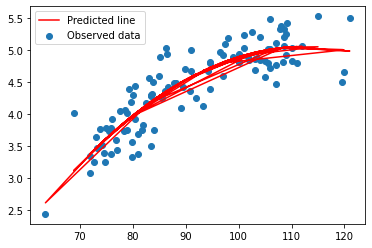

In [27]:
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [28]:
# Error calculation
res4 = wcat.AT - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


32.24444782776222

In [29]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,32.760177
1,Log model,32.496885
2,Exp model,38.529002
3,Poly model,32.244448


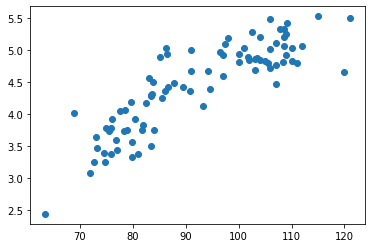

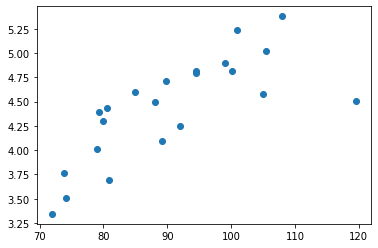

In [30]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

plt.scatter(train.Waist, np.log(train.AT))

plt.figure(2)
plt.scatter(test.Waist, np.log(test.AT))

In [31]:
finalmodel = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           1.97e-29
Time:                        04:05:25   Log-Likelihood:                -20.607
No. Observations:                  87   AIC:                             47.21
Df Residuals:                      84   BIC:                             54.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.2342      1.676     -4.317      0.000     -10.566      -3.902
Waist                0.2139      0.037      5.828      0.000       0.141       0.287
I(Waist * Waist)    -0.0009      0.000     -4.691      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.075
Skew:                           0.262   Prob(JB):                        0.584
Kurtosis:                       3.149   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

35     110.704292
39      48.556433
17      34.240617
91     151.664374
25      99.887788
31      83.140446
68     150.238571
27      53.620822
74     157.897976
47     110.704292
50      90.377060
104    133.639298
18      33.332009
103    137.000440
49      49.546042
38      51.900604
61      70.028673
64     163.581641
97     129.379045
10      28.690309
23      87.807398
21      55.019604
dtype: float64

In [33]:
# Model Evaluation on Test data
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

30.47273442306647

In [34]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

98      95.552779
92     125.379883
77     147.222315
90     123.341167
53      37.902682
          ...    
45     155.832659
79     159.943100
34     140.586592
102    166.188208
11      36.517169
Length: 87, dtype: float64

In [35]:
# Model Evaluation on train data
train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

32.643864970512